<center><img src="https://drive.google.com/uc?export=view&id=1ia67jZrMZx4V45HYDM7pxcoZrPJE-NMP" alt="PSUT"  width="180px"> 
<p> 
King Hussein School for Computing Sciences <br>
Department of Data Science <br>
Artificial Intelligence Lab <br>
</p></center>


<!-- **Title**:  *Review of Python*  -->
<hr>
<h4><b>Grading Criteria</b></h4>

<table border>
<tr>
<td> <b>Exercise</b></td>
<td> <b>Ex.1</b></td>
</tr>

<tr>
<td> <b>Marks</b></td>
<td> /10</td>

</tr>
<tr>
<td> <b>Total</b></td>
<th colspan=6> /10</th> 
</tr>
</table>

<h4><b>Lab Objectives</b></h4>
<ul>
<li> Familiarizing students with the problem solving process. 
<li> Familiarizing students with problem representation methods.
<li> Using A* algorithm to search for a solution to a problem.
<li> Comparing the impact of heuristic functions on the performance of search algorithm.
</ul>

<h4><b>Lab Instructions</b></h4>
<ul>
<li> Create a new folder on desktop and name it by your “ID-FirstName-LastName-LabX”.
<li> Create a new folder on Google drive and name it by your.“ID-FirstName-LastName-DE-Lab” and inside this folder create a new folder for each lab.
<li> You must upload your solutions to e-learning as follows as .ipynb and .pdf (ctrl+P) files.
<li> Each lab assignment is of 10 marks.</li>
<li> <b>Do not</b> leave before discussing your solutions with the instructor. </li> 
</ul>



#Exercise 1:
<h5> <u> Exercise Objectives: </u></h5>

* Analyzing the problem.
* Representing graph.
* Using A* algorithm to find solutions. 

<u> Problem Description: </u>

N-Puzzle or sliding puzzle is a popular puzzle that consists of N tiles where N can be 8, 15, 24, and so on. In our example N = 8. The puzzle is divided into sqrt(N+1) rows and sqrt(N+1) columns. Eg. 15-Puzzle will have 4 rows and 4 columns and an 8-Puzzle will have 3 rows and 3 columns. The puzzle consists of N tiles and one empty space where the tiles can be moved. Start and Goal configurations (also called state) of the puzzle are provided. The puzzle can be solved by moving the tiles one by one in the single empty space and thus achieving the Goal configuration.

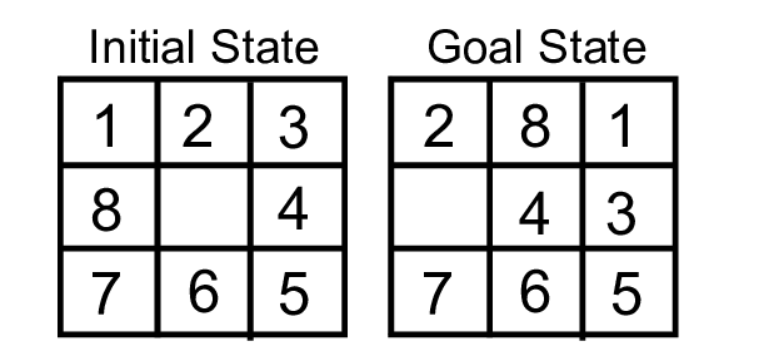


The tiles in the initial(start) state can be moved in the empty space in a particular order and thus achieve the goal state.

**Rules for solving the puzzle.**

Instead of moving the tiles in the empty space, we can visualize moving the empty space in place of the tile, basically swapping the tile with the empty space. The empty space can only move in four directions viz.,

1. Up
2. Down
3. Right or
4. Left

The empty space cannot move diagonally and can take only one step at a time (i.e. move the empty space one position at a time).

Informed search  algorithm is aware of where the best chances of finding the element are and the algorithm heads that way! Heuristic search is an informed search technique. A heuristic value tells the algorithm which path will provide the solution as early as possible. The heuristic function is used to generate this heuristic value. Different heuristic functions can be designed depending on the searching problem. So we can conclude that Heuristic search is a technique that uses a heuristic value for optimizing the search.


**How A* solves the 8-Puzzle problem.**

We first move the empty space in all the possible directions in the start state and calculate the f-score for each state. This is called expanding the current state.
After expanding the current state, it is pushed into the closed list and the newly generated states are pushed into the open list. A state with the least f-score is selected and expanded again. This process continues until the goal state occurs as the current state. Basically, here we are providing the algorithm a measure to choose its actions. The algorithm chooses the best possible action and proceeds in that path.
This solves the issue of generating redundant child states, as the algorithm will expand the node with the least f-score.

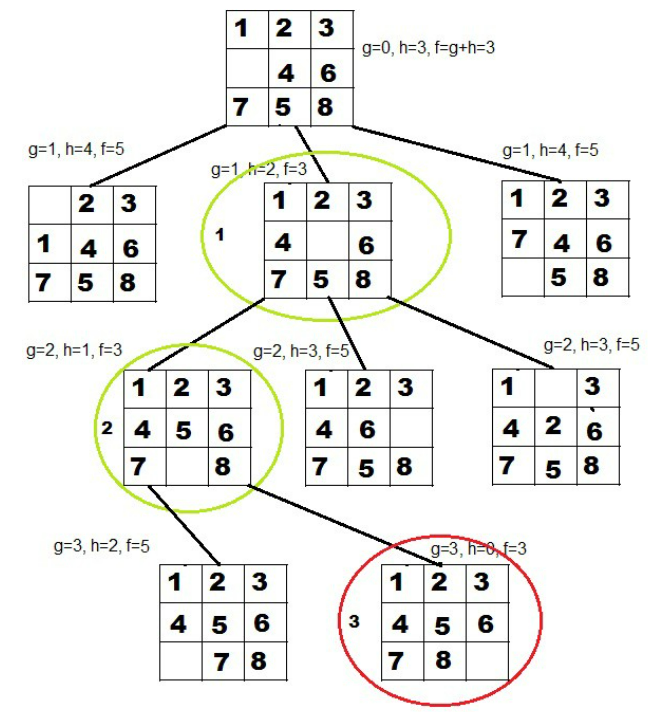


In this exercise, you are given the following code and asked to implement three heuristic functions:

1. The first heuristic value of a state is its number of misplaced tiles from the goal state (`h1`), which is the sum over each tile of {if it is in its goal position 0, else 1}. 

2. The second heuristic function (`h2`) computes the summation of Manhattan distance. Manhattan distance (`h2`) from the goal state, which is the sum of the Manhattan distances of each tile from its goal position. 

3. Suggest a heuristic function (`h3`).

Discuss which of the three functions helps the A* to find the goal as early as possible. Why?  

In [2]:
class Node:
    def __init__(self,data,level,fval):
        """ Initialize the node with the data, level of the node and the calculated fvalue """
        self.data = data
        self.level = level
        self.fval = fval

    def generate_child(self):
        """ Generate child nodes from the given node by moving the blank space
            either in the four directions {up,down,left,right} """
        x,y = self.find(self.data,'_')
        """ val_list contains position values for moving the blank space in either of
            the 4 directions [up,down,left,right] respectively. """
        val_list = [[x,y-1],[x,y+1],[x-1,y],[x+1,y]]
        children = []
        for i in val_list:
            child = self.shuffle(self.data,x,y,i[0],i[1])
            if child is not None:
                child_node = Node(child,self.level+1,0)
                children.append(child_node)
        return children
        
    def shuffle(self,puz,x1,y1,x2,y2):
        """ Move the blank space in the given direction and if the position value are out
            of limits the return None """
        if x2 >= 0 and x2 < len(self.data) and y2 >= 0 and y2 < len(self.data):
            temp_puz = []
            temp_puz = self.copy(puz)
            temp = temp_puz[x2][y2]
            temp_puz[x2][y2] = temp_puz[x1][y1]
            temp_puz[x1][y1] = temp
            return temp_puz
        else:
            return None
            

    def copy(self,root):
        """ Copy function to create a similar matrix of the given node"""
        temp = []
        for i in root:
            t = []
            for j in i:
                t.append(j)
            temp.append(t)
        return temp    
            
    def find(self,puz,x):
        """ Specifically used to find the position of the blank space """
        for i in range(0,len(self.data)):
            for j in range(0,len(self.data)):
                if puz[i][j] == x:
                    return i,j


In [26]:
import math

In [41]:
class Puzzle:
    def __init__(self,size, n):
        """ Initialize the puzzle size by the specified size,open and closed lists to empty """
        self.n = size
        self.open = []
        self.closed = []
        self.hNo = n

    def accept(self):
        """ Accepts the puzzle from the user """
        puz = []
        for i in range(0,self.n):
            temp = input().split(" ")
            puz.append(temp)
        return puz

    def f(self,start,goal,hNo):
        """ Heuristic Function to calculate hueristic value f(x) = h(x) + g(x) """
        return self.computH(start,goal,hNo)+start.level


    def computH (self,start,goal,hNo):
        if self.hNo == 1:
          return self.h1(start.data,goal)
        elif self.hNo == 2:
          return self.h2(start.data,goal)
        else:
          return self.h3(start.data,goal)

    def h1(self,start,goal):
        import math
        """ Calculates the Manhattan distances"""
        temp = 0
        for i in range(self.n):
          for j in range(self.n):
            if start[i][j]!="_":
              for a in range(self.n):
                for b in range(self.n):
                  if goal[a][b]==start[i][j]: 
                    temp+=abs(i-a)+abs(j-b)

        return temp


    def h2 (self,start,goal):
        """ Calculates the different between the given puzzles """
        temp = 0
        for i in range(self.n):
             for j in range(self.n):
                 if start[i][j] != goal[i][j] and start[i][j] != '_':
                     temp += 1
        return temp

    def h3(self,start,goal):
        import math
        temp = 0
        for i in range(self.n):
          for j in range(self.n):
            if start[i][j]!="_":
              for a in range(self.n):
                for b in range(self.n):
                  if goal[a][b]==start[i][j]: 
                    temp+=math.sqrt(pow((i-a),2)+pow((j-b),2))

        return temp 
        

    def process(self):
        """ Accept Start and Goal Puzzle state"""
        print("Enter the start state matrix \n")
        start = self.accept()
        print("Enter the goal state matrix \n")        
        goal = self.accept()

        start = Node(start,0,0)
        start.fval = self.f(start,goal, self.hNo)
        """ Put the start node in the open list"""
        self.open.append(start)
        print("\n\n")
        while True:
            cur = self.open[0]
            print("")
            print("  | ")
            print("  | ")
            print(" \\\'/ \n")
            for i in cur.data:
                for j in i:
                    print(j,end=" ")
                print("")
            """ If the difference between current and goal node is 0 we have reached the goal node"""
            if(self.computH(cur,goal,self.hNo) == 0):         
                break
            for i in cur.generate_child():
                i.fval = self.f(i,goal, self.hNo)
                self.open.append(i)
            self.closed.append(cur)
            del self.open[0]

            """ sort the opne list based on f value """
            self.open.sort(key = lambda x:x.fval,reverse=False)

In [46]:
puz = Puzzle(3,1)
puz.process()

Enter the start state matrix 

1 2 _
3 4 5
6 7 8
Enter the goal state matrix 

_ 1 2
3 4 5
6 7 8




  | 
  | 
 \'/ 

1 2 _ 
3 4 5 
6 7 8 

  | 
  | 
 \'/ 

1 _ 2 
3 4 5 
6 7 8 

  | 
  | 
 \'/ 

_ 1 2 
3 4 5 
6 7 8 


In [47]:
puz = Puzzle(3,3)
puz.process()

Enter the start state matrix 

1 2 _
3 4 5
6 7 8
Enter the goal state matrix 

_ 1 2
3 4 5
6 7 8




  | 
  | 
 \'/ 

1 2 _ 
3 4 5 
6 7 8 

  | 
  | 
 \'/ 

1 _ 2 
3 4 5 
6 7 8 

  | 
  | 
 \'/ 

_ 1 2 
3 4 5 
6 7 8 


In [45]:
puz = Puzzle(3,3)
puz.process()

Enter the start state matrix 

1 2 _
3 4 5
6 7 8
Enter the goal state matrix 

_ 1 2
3 4 5
6 7 8




  | 
  | 
 \'/ 

1 2 _ 
3 4 5 
6 7 8 

  | 
  | 
 \'/ 

1 _ 2 
3 4 5 
6 7 8 

  | 
  | 
 \'/ 

_ 1 2 
3 4 5 
6 7 8 
